In [13]:
#!pip install pydot
#!pip install keras
#!pip install tensorflow

### Importación de Librerías

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

Se definen la ubicación de las imagenes de prueba y de entrenamiento

In [15]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/MCD/PCD/imagenes/train"
validation_dir = "/content/drive/MyDrive/Colab Notebooks/MCD/PCD/imagenes/test"

generación de datos de imágenes con el fin de aumentar el conjunto de datos de entrenamiento mediante la aplicación de transformaciones aleatorias a las imágenes.

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [17]:
validation_datagen = ImageDataGenerator(rescale=1./255)

Le indicamos cuales son las imagenes a usar como validacion y entrenamiento

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 66 images belonging to 2 classes.


In [19]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 31 images belonging to 2 classes.


La siguiente parte define y entrena una red neuronal convolucional utilizando Keras para clasificar las imagenes entre perros y gatos. El modelo consta de tres capas convolucionales con 32, 64 y 128 filtros respectivamente, cada una seguida de una capa de max-pooling para reducir las dimensiones espaciales. Después de aplanar la salida de la última capa de max-pooling, el modelo incluye una capa densa con 512 neuronas y una capa de dropout para prevenir el sobreajuste. La capa de salida tiene una sola neurona con activación sigmoide para producir una probabilidad y realizar la clasificación. El modelo se compila con el optimizador Adam y la función de pérdida de entropía cruzada binaria, y se entrena durante 20 épocas utilizando generadores de datos para las imágenes de entrenamiento y validación

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6097 - loss: 0.6573 - val_accuracy: 0.5484 - val_loss: 6.1436
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 685ms/step - accuracy: 0.5312 - loss: 6.8102 - val_accuracy: 0.5484 - val_loss: 0.7951
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5797 - loss: 0.8724 - val_accuracy: 0.4516 - val_loss: 3.4417
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3438 - loss: 4.2252 - val_accuracy: 0.4516 - val_loss: 1.9387
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4375 - loss: 1.6076 - val_accuracy: 0.4516 - val_loss: 0.7459
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.0000e+00 - loss: 0.9297 - val_accuracy: 0.4516 - val_loss: 0.6930
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5588 - loss: 0.6952 - val_accuracy: 0.5484 - val_loss: 0.6880
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 686ms/step - accuracy: 0.6250 - loss: 0.6868 - val_accuracy: 0.5484 - val_loss: 0.6835
Epoch 

Guardamos el modelo y las metricas obtenidas

In [21]:
model.save('/content/drive/MyDrive/Colab Notebooks/MCD/PCD/Modelos/dogs_vs_cats_model.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Las gráficas muestran que la precisión de entrenamiento presenta alta variabilidad, especialmente en las primeras épocas, mientras que la precisión de validación se mantiene relativamente estable alrededor del 50-60%, indicando posibles dificultades del modelo para generalizar. La pérdida de entrenamiento y validación disminuyen rápidamente al inicio, pero se estabilizan sin mejoras significativas adicionales, con la pérdida de validación ligeramente más alta que la de entrenamiento, sugiriendo un posible sobreajuste.

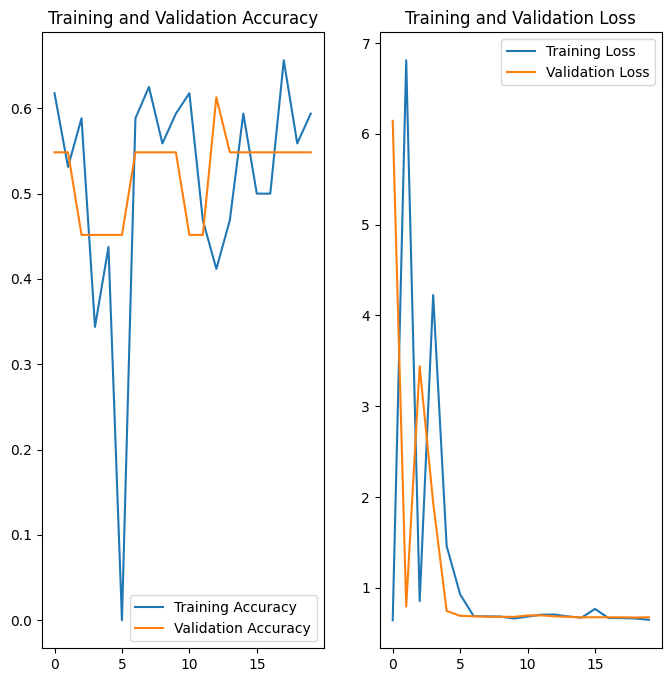

In [22]:
epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Generamos las funciones, de preparacion de la imagen y obtener las probabilidades

In [23]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/MCD/PCD/Modelos/dogs_vs_cats_model.h5')

def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image(model, img_path):
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)
    return prediction

def display_prediction(img_path, prediction):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: Dog ({prediction[0][0]*100:.2f}%),Cat ({(1 - prediction[0][0])*100:.2f}%)')
    plt.show()


Cargamos la imagen y probamos el modelo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


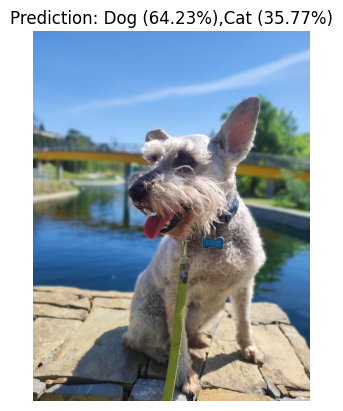

In [24]:
img_path = '/content/drive/MyDrive/Colab Notebooks/MCD/PCD/imagenes/test/perros/IMG-20241107-WA0052.jpg'

prediction = predict_image(model, img_path)

display_prediction(img_path, prediction)